<a href="https://colab.research.google.com/github/nickintj/20242R0136COSE47402/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ch.0 Installation**

### **0.1. Installation**

In [ ]:
!pip3 install d2l==1.0.3

## **Ch.2 Preliminaries**

### **2.1. Data Manipulation**

#### 2.1.1. Getting Started

In [ ]:
import torch


In [ ]:
x=torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
x.numel()

12

In [ ]:
len(x)

12

In [ ]:
x.shape

torch.Size([12])

In [ ]:
X=x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [ ]:
torch.randn(3, 4)

tensor([[ 0.1192, -0.7301,  0.9975, -0.9678],
        [-0.3968, -0.7179,  0.2225, -0.7805],
        [-0.1048, -0.4151, -1.9217,  0.8286]])

In [ ]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

#### 2.1.2. Indexing and Slicing

In [ ]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [ ]:
X[1, 2]=17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
X[:2, :]=12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

#### 2.1.3. Operations

In [ ]:
torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

In [ ]:
x=torch.tensor([1.0, 2, 4, 8])
y=torch.tensor([2, 2, 2, 2])
x+y, x-y, x*y, x/y, x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [ ]:
X=torch.arange(12, dtype=torch.float32).reshape((3,4))
Y=torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [ ]:
X==Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
X.sum()

tensor(66.)

#### 2.1.4. Broadcasting

In [ ]:
a=torch.arange(3).reshape((3, 1))
b=torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [ ]:
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

#### 2.1.5. Saving Memory

In [ ]:
before=id(Y)
Y=Y+X
id(Y)==before

False

In [ ]:
Z=torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:]=X+Y
print('id(Z):', id(Z))

id(Z): 132633704226048
id(Z): 132633704226048


In [ ]:
before=id(X)
X+=Y
id(X)==before

True

#### 2.1.6. Conversion to Other Python Objects

In [ ]:
A=X.numpy()
B=torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [ ]:
a=torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

### **2.2. Data Preprocessing**

#### 2.2.1. Reading the Dataset

In [ ]:
import os

In [ ]:
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file=os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
  f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


#### 2.2.2. Data Preparation

In [ ]:
inputs, targets=data.iloc[:, 0:2], data.iloc[:, 2]
inputs=pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [ ]:
inputs=inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


#### 2.2.3. Conversion to the Tensor Format

In [ ]:
import torch

In [ ]:
X=torch.tensor(inputs.to_numpy(dtype=float))
y=torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

### **2.3. Linear Algebra**

#### 2.3.1. Scalars

In [ ]:
x=torch.tensor(3.0)
y=torch.tensor(2.0)

x+y, x*y, x/y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

#### 2.3.2. Vectors

In [ ]:
x=torch.arange(3)
x

tensor([0, 1, 2])

In [ ]:
x[2]

tensor(2)

In [ ]:
len(x)

3

In [ ]:
x.shape

torch.Size([3])

#### 2.3.3. Matrices

In [ ]:
A=torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [ ]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [ ]:
A=torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A==A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

#### 2.3.4. Tensors

In [ ]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

#### 2.3.5. Basic Properties of Tensor Arithmetic

In [ ]:
A=torch.arange(6, dtype=torch.float32).reshape(2, 3)
B=A.clone()
A, A+B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [ ]:
A*B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [ ]:
a=2
X=torch.arange(24).reshape(2, 3, 4)
a+X, (a*X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

#### 2.3.6. Reduction

In [ ]:
x=torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [ ]:
A.shape, A.sum()

(torch.Size([2, 3]), tensor(15.))

In [ ]:
A.shape, A.sum(axis=0).shape

(torch.Size([2, 3]), torch.Size([3]))

In [ ]:
A.shape, A.sum(axis=1).shape

(torch.Size([2, 3]), torch.Size([2]))

In [ ]:
A.sum(axis=[0, 1])==A.sum()

tensor(True)

In [ ]:
A.mean(), A.sum()/A.numel()

(tensor(2.5000), tensor(2.5000))

In [ ]:
A.mean(axis=0), A.sum(axis=0)/A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

#### 2.3.7. Non-Reduction Sum

In [ ]:
sum_A=A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [ ]:
A/sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [ ]:
A.cumsum(axis=0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

#### 2.3.8. Dot Products

In [ ]:
y=torch.ones(3, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [ ]:
torch.sum(x*y)

tensor(3.)

#### 2.3.9. Matrix–Vector Products

In [ ]:
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

#### 2.3.10. Matrix–Matrix Multiplication

In [ ]:
B=torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

#### 2.3.11. Norms

In [ ]:
u=torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [ ]:
torch.abs(u).sum()

tensor(7.)

In [ ]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

### **2.5. Automatic Differentiation**

In [ ]:
import torch

#### 2.5.1. A Simple Function

In [ ]:
x=torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [ ]:
x.requires_grad_(True)
x.grad

In [ ]:
y=2*torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [ ]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [ ]:
x.grad==4*x

tensor([True, True, True, True])

In [ ]:
x.grad.zero_()
y=x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

#### 2.5.2. Backward for Non-Scalar Variables

In [ ]:
x.grad.zero_()
y=x*x
y.backward(gradient=torch.ones(len(y)))
x.grad

tensor([0., 2., 4., 6.])

#### 2.5.3. Detaching Computation

In [ ]:
x.grad.zero_()
y=x*x
u=y.detach()
z=u * x

z.sum().backward()
x.grad==u

tensor([True, True, True, True])

In [ ]:
x.grad.zero_()
y.sum().backward()
x.grad==2 * x

tensor([True, True, True, True])

#### 2.5.4. Gradients and Python Control Flow

In [ ]:
def f(a):
    b=a*2
    while b.norm()<1000:
        b=b*2
    if b.sum()>0:
        c=b
    else:
        c=100*b
    return c

In [ ]:
a=torch.randn(size=(), requires_grad=True)
d=f(a)
d.backward()

In [ ]:
a.grad==d/a

tensor(True)

## **Ch.3 Linear Neural Networks for Regression**

### **3.1. Linear Regression**

In [ ]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

#### 3.1.2. Vectorisation for Speed

In [ ]:
n=10000
a=torch.ones(n)
b=torch.ones(n)

In [ ]:
c=torch.zeros(n)
t=time.time()
for i in range(n):
  c[i]=a[i]+b[i]
f'{time.time()-t:.5f} sec'

'0.16245 sec'

In [ ]:
t=time.time()
d=a+b
f'{time.time()-t:.5f} sec'

'0.00030 sec'

#### 3.1.3. The Normal Distribution and Squared Loss

In [ ]:
def normal(x, mu, sigma):
  p=1/math.sqrt(2*math.pi*sigma**2)
  return p*np.exp(-0.5*(x-mu)**2/sigma**2)

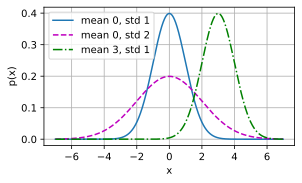

In [ ]:
# Use NumPy again for visualization
x=np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params=[(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

### **3.2. Object-Oriented Design for Implementation**

In [ ]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

#### 3.2.1. Utilities

In [ ]:
def add_to_class(Class):
  def wrapper(obj):
    setattr(Class, obj.__name__, obj)
  return wrapper

In [ ]:
class A:
  def __init__(self):
    self.b=1

a=A()

In [ ]:
@add_to_class(A)
def do(self):
  print('Class attribute "b" is', self.b)

a.do()

Class attribute "b" is 1


In [ ]:
class HyperParameters:
  def save_hyperparameters(self, ignore=[]):
    raise NotImplemented

In [ ]:
class B(d2l.HyperParameters):
  def __init__(self, a, b, c):
    self.save_hyperparameters(ignore=['c'])
    print('self.a =', self.a, 'self.b =', self.b)
    print('There is no self.c =', not hasattr(self, 'c'))

b=B(a=1, b=2, c=3)

self.a = 1 self.b = 2
There is no self.c = True


In [ ]:
class ProgressBoard(d2l.HyperParameters):
  def __init__(self, xlabel=None, ylabel=None, xlim=None,
               ylim=None, xscale='linear', yscale='linear',
               ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
               fig=None, axes=None, figsize=(3.5, 2.5), display=True):
    self.save_hyperparameters()

  def draw(self, x, y, label, every_n=1):
    raise NotImplemented

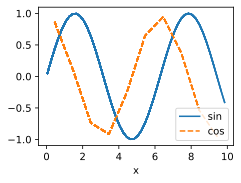

In [ ]:
board=d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
  board.draw(x, np.sin(x), 'sin', every_n=2)
  board.draw(x, np.cos(x), 'cos', every_n=10)

#### 3.2.2. Models

In [ ]:
class Module(nn.Module, d2l.HyperParameters):
  def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
    super().__init__()
    self.save_hyperparameters()
    self.board = ProgressBoard()

  def loss(self, y_hat, y):
    raise NotImplementedError

  def forward(self, X):
    assert hasattr(self, 'net'), 'Neural network is defined'
    return self.net(X)

  def plot(self, key, value, train):
    assert hasattr(self, 'trainer'), 'Trainer is not inited'
    self.board.xlabel='epoch'
    if train:
      x=self.trainer.train_batch_idx/\
          self.trainer.num_train_batches
      n=self.trainer.num_train_batches/\
          self.plot_train_per_epoch
    else:
      x=self.trainer.epoch+1
      n=self.trainer.num_val_batches/\
          self.plot_valid_per_epoch
    self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                    ('train_' if train else 'val_')+key,
                    every_n=int(n))

    def training_step(self, batch):
        l=self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l=self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

#### 3.2.3. Data

In [ ]:
class DataModule(d2l.HyperParameters):
  def __init__(self, root='../data', num_workers=4):
    self.save_hyperparameters()

  def get_dataloader(self, train):
    raise NotImplementedError

  def train_dataloader(self):
    return self.get_dataloader(train=True)

  def val_dataloader(self):
    return self.get_dataloader(train=False)

#### 3.2.4. Training

In [ ]:
class Trainer(d2l.HyperParameters):
  def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
    self.save_hyperparameters()
    assert num_gpus==0, 'No GPU support yet'

  def prepare_data(self, data):
    self.train_dataloader=data.train_dataloader()
    self.val_dataloader=data.val_dataloader()
    self.num_train_batches=len(self.train_dataloader)
    self.num_val_batches=(len(self.val_dataloader)
                            if self.val_dataloader is not None else 0)

  def prepare_model(self, model):
    model.trainer=self
    model.board.xlim=[0, self.max_epochs]
    self.model=model

  def fit(self, model, data):
    self.prepare_data(data)
    self.prepare_model(model)
    self.optim=model.configure_optimizers()
    self.epoch=0
    self.train_batch_idx=0
    self.val_batch_idx=0
    for self.epoch in range(self.max_epochs):
      self.fit_epoch()

  def fit_epoch(self):
    raise NotImplementedError

### **3.4. Linear Regression Implementation from Scratch**

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

#### 3.4.1. Defining the Model


In [ ]:
class LinearRegressionScratch(d2l.Module):
  def __init__(self, num_inputs, lr, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.w=torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
    self.b=torch.zeros(1, requires_grad=True)

In [ ]:
@d2l.add_to_class(LinearRegressionScratch)
def forward(self, X):
  return torch.matmul(X, self.w)+self.b

#### 3.4.2. Defining the Loss Function

In [ ]:
@d2l.add_to_class(LinearRegressionScratch)
def loss(self, y_hat, y):
  l=(y_hat-y)**2/2
  return l.mean()

#### 3.4.3. Defining the Optimization Algorithm

In [ ]:
class SGD(d2l.HyperParameters):
  def __init__(self, params, lr):
    self.save_hyperparameters()

  def step(self):
    for param in self.params:
      param-=self.lr*param.grad

  def zero_grad(self):
    for param in self.params:
      if param.grad is not None:
        param.grad.zero_()

In [ ]:
@d2l.add_to_class(LinearRegressionScratch)
def configure_optimizers(self):
  return SGD([self.w, self.b], self.lr)

#### 3.4.4. Training

In [ ]:
@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self, batch):
  return batch

@d2l.add_to_class(d2l.Trainer)
def fit_epoch(self):
  self.model.train()
  for batch in self.train_dataloader:
    loss=self.model.training_step(self.prepare_batch(batch))
    self.optim.zero_grad()
    with torch.no_grad():
      loss.backward()
      if self.gradient_clip_val>0:
        self.clip_gradients(self.gradient_clip_val, self.model)
      self.optim.step()
    self.train_batch_idx+=1
  if self.val_dataloader is None:
    return
  self.model.eval()
  for batch in self.val_dataloader:
    with torch.no_grad():
      self.model.validation_step(self.prepare_batch(batch))
    self.val_batch_idx+=1

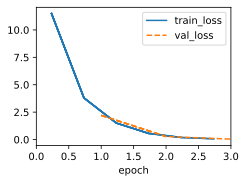

In [ ]:
model=LinearRegressionScratch(2, lr=0.03)
data=d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer=d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [ ]:
with torch.no_grad():
  print(f'error in estimating w: {data.w-model.w.reshape(data.w.shape)}')
  print(f'error in estimating b: {data.b-model.b}')

error in estimating w: tensor([ 0.1017, -0.1478])
error in estimating b: tensor([0.2090])


## **Ch.4 Linear Neural Networks for Classification**

### 4.1. Softmax Regression

(No Codes)

### 4.2. The Image Classification Dataset

In [ ]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

#### 4.2.1. Loading the Dataset

In [ ]:
class FashionMNIST(d2l.DataModule):
  def __init__(self, batch_size=64, resize=(28, 28)):
    super().__init__()
    self.save_hyperparameters()
    trans=transforms.Compose([transforms.Resize(resize),
                              transforms.ToTensor()])
    self.train=torchvision.datasets.FashionMNIST(
        root=self.root, train=True, transform=trans, download=True)
    self.val=torchvision.datasets.FashionMNIST(
        root=self.root, train=False, transform=trans, download=True)

In [ ]:
data=FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

100%|██████████| 26421880/26421880 [00:04<00:00, 6104272.29it/s] 


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 342907.86it/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6334215.26it/s]


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5116653.32it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



(60000, 10000)

In [ ]:
data.train[0][0].shape

torch.Size([1, 32, 32])

In [ ]:
@d2l.add_to_class(FashionMNIST)
def text_labels(self, indices):
  labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
            'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
  return [labels[int(i)] for i in indices]

#### 4.2.2. Reading a Minibatch

In [ ]:
@d2l.add_to_class(FashionMNIST)
def get_dataloader(self, train):
  data=self.train if train else self.val
  return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                     num_workers=self.num_workers)

In [ ]:
X, y=next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [ ]:
tic=time.time()
for X, y in data.train_dataloader():
  continue
f'{time.time()-tic:.2f} sec'

'10.86 sec'

#### 4.2.3. Visualisatoin

In [ ]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
  raise NotImplementedError

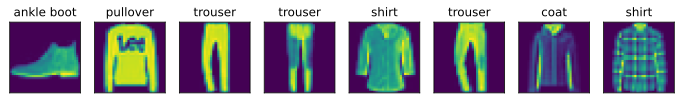

In [ ]:
@d2l.add_to_class(FashionMNIST)
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
  X, y=batch
  if not labels:
    labels=self.text_labels(y)
  d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch=next(iter(data.val_dataloader()))
data.visualize(batch)

### **4.3. The Base Classification Model**

In [ ]:
import torch
from d2l import torch as d2l

#### 4.3.1. The Classifier Class

In [ ]:
class Classifier(d2l.Module):
  def validation_step(self, batch):
    Y_hat = self(*batch[:-1])
    self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
    self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

In [ ]:
@d2l.add_to_class(d2l.Module)
def configure_optimizers(self):
  return torch.optim.SGD(self.parameters(), lr=self.lr)

#### 4.3.2. Accuracy

In [ ]:
@d2l.add_to_class(Classifier)
def accuracy(self, Y_hat, Y, averaged=True):
  Y_hat=Y_hat.reshape((-1, Y_hat.shape[-1]))
  preds=Y_hat.argmax(axis=1).type(Y.dtype)
  compare=(preds==Y.reshape(-1)).type(torch.float32)
  return compare.mean() if averaged else compare

### **4.4. Softmax Regression Implementation from Scratch**

In [ ]:
import torch
from d2l import torch as d2l

#### 4.4.1. The Softmax

In [ ]:
X=torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [ ]:
def softmax(X):
  X_exp=torch.exp(X)
  partition=X_exp.sum(1, keepdims=True)
  return X_exp/partition

In [ ]:
X=torch.rand((2, 5))
X_prob=softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.2813, 0.1796, 0.2314, 0.1488, 0.1589],
         [0.1986, 0.2282, 0.1475, 0.2254, 0.2003]]),
 tensor([1.0000, 1.0000]))

#### 4.4.2. The Model

In [ ]:
class SoftmaxRegressionScratch(d2l.Classifier):
  def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.W=torch.normal(0, sigma, size=(num_inputs, num_outputs),
                        requires_grad=True)
    self.b=torch.zeros(num_outputs, requires_grad=True)

  def parameters(self):
    return [self.W, self.b]

In [ ]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
  X=X.reshape((-1, self.W.shape[0]))
  return softmax(torch.matmul(X, self.W)+self.b)

#### 4.4.3. The Cross-Entropy Loss

In [ ]:
y=torch.tensor([0, 2])
y_hat=torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [ ]:
def cross_entropy(y_hat, y):
  return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [ ]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
  return cross_entropy(y_hat, y)

#### 4.4.4. Training

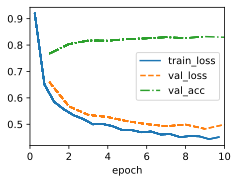

In [ ]:
data=d2l.FashionMNIST(batch_size=256)
model=SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer=d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

#### 4.4.5. Prediction

In [ ]:
X, y=next(iter(data.val_dataloader()))
preds=model(X).argmax(axis=1)
preds.shape

torch.Size([256])

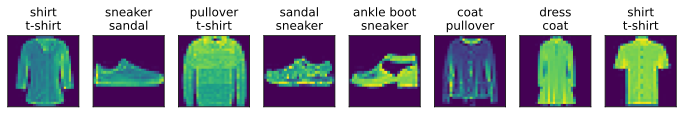

In [ ]:
wrong=preds.type(y.dtype)!=y
X, y, preds=X[wrong], y[wrong], preds[wrong]
labels=[a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

## **Ch.5 Multilayer Perceptrons**

### 5.1. Multilayer Perceptrons

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

#### 5.1.2. Activation Functions

##### 5.1.2.1. ReLU Function

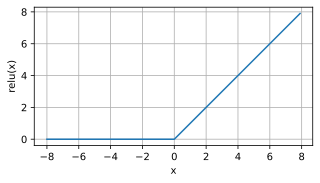

In [ ]:
x=torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y=torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

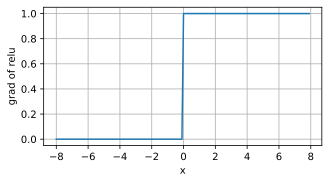

In [ ]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

##### 5.1.2.2. Sigmoid Function

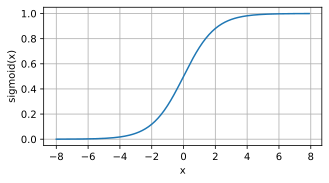

In [ ]:
y=torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

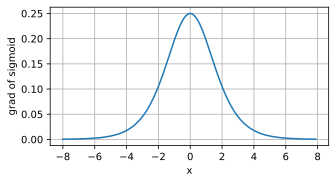

In [ ]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

##### 5.1.2.3. Tanh Function

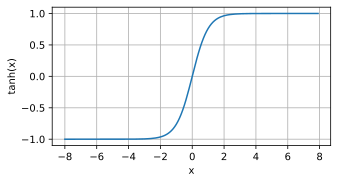

In [ ]:
y=torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

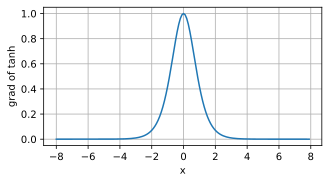

In [ ]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

### 5.2. Implementation of Multilayer Perceptrons

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

#### 5.2.1. Implementation from Scratch

##### 5.2.1.1. Initialising Model Parameters

In [ ]:
class MLPScratch(d2l.Classifier):
  def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.W1=nn.Parameter(torch.randn(num_inputs, num_hiddens)*sigma)
    self.b1=nn.Parameter(torch.zeros(num_hiddens))
    self.W2=nn.Parameter(torch.randn(num_hiddens, num_outputs)*sigma)
    self.b2=nn.Parameter(torch.zeros(num_outputs))

##### 5.2.1.2. Model

In [ ]:
def relu(X):
  a=torch.zeros_like(X)
  return torch.max(X, a)

In [ ]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
  X=X.reshape((-1, self.num_inputs))
  H=relu(torch.matmul(X, self.W1)+self.b1)
  return torch.matmul(H, self.W2)+self.b2

##### 5.2.1.3. Training

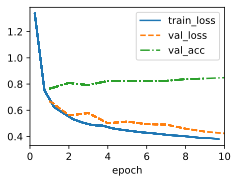

In [ ]:
model=MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data=d2l.FashionMNIST(batch_size=256)
trainer=d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

#### 5.2.2. Concise Implementation

##### 5.2.2.1. Model

In [ ]:
class MLP(d2l.Classifier):
  def __init__(self, num_outputs, num_hiddens, lr):
    super().__init__()
    self.save_hyperparameters()
    self.net=nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                           nn.ReLU(), nn.LazyLinear(num_outputs))

##### 5.2.2. Training

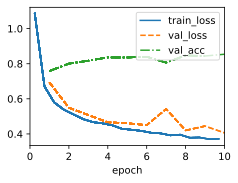

In [ ]:
model=MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

### 5.3. Forward Propagation, Backward Propagation, and Computational Graphs

(No Codes)

## **Discussions and Exercises**

### **Ch.2**

#### Discussions / Excercises

##### 2.1.

① Can we use '<' and '>' to compare each elements in tensor?

In [ ]:
X=torch.arange(12, dtype=torch.float32).reshape((3,4))
Y=torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
X, Y

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[2., 1., 4., 3.],
         [1., 2., 3., 4.],
         [4., 3., 2., 1.]]))

In [ ]:
X<Y

tensor([[ True, False,  True, False],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
X>Y

tensor([[False, False, False, False],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

Answer: Yes.

② Can torch auto-calculate the result of sum between different dimensional tensor, especially for more than 2 dimension? (e.g. 3-dimensional tensor)

+) All dimensions have to be n times or 1/n times other dimensions to calculate. (n∈N)

In [ ]:
a=torch.arange(6).reshape((3, 1, 2))
b=torch.arange(8).reshape((1, 2, 4))
a, b

(tensor([[[0, 1]],
 
         [[2, 3]],
 
         [[4, 5]]]),
 tensor([[[0, 1, 2, 3],
          [4, 5, 6, 7]]]))

In [ ]:
a+b

RuntimeError: The size of tensor a (2) must match the size of tensor b (4) at non-singleton dimension 2

In [ ]:
a=torch.arange(6).reshape((3, 1, 2))
b=torch.arange(8).reshape((1, 4, 2))
a, b
a+b

tensor([[[ 0,  2],
         [ 2,  4],
         [ 4,  6],
         [ 6,  8]],

        [[ 2,  4],
         [ 4,  6],
         [ 6,  8],
         [ 8, 10]],

        [[ 4,  6],
         [ 6,  8],
         [ 8, 10],
         [10, 12]]])

In [ ]:
a=torch.arange(12).reshape((3, 4, 1))
b=torch.arange(8).reshape((1, 4, 2))
a, b
a+b

tensor([[[ 0,  1],
         [ 3,  4],
         [ 6,  7],
         [ 9, 10]],

        [[ 4,  5],
         [ 7,  8],
         [10, 11],
         [13, 14]],

        [[ 8,  9],
         [11, 12],
         [14, 15],
         [17, 18]]])

Answer: At most 2 dimensions can be different, and others have to be the same.

### **Ch.3**

#### Discussions / Excercises

##### 3.1.

The key technique for optimising nearly every deep learning model consists of iteratively reducing the error by updating the parameters in the direction that incrementally lowers the loss function. This algorithm is called ***gradient descent***.

The most naive application of gradient descent consists of taking the derivative of the loss function, which is an average of the losses computed on every single example in the dataset. In practice, this can be **extremely slow**: we must pass over the entire dataset before making a single update, even if the update steps might be very powerful (Liu and Nocedal, 1989).

The other extreme is to consider **only a single example** at a time and to take update steps based on one observation at a time. The resulting algorithm, ***stochastic gradient descent (SGD)*** can be an effective strategy (Bottou, 2010), even for large datasets.

Unfortunately, SGD has drawbacks, both computational and statistical. One problem is that it can **take a lot longer** to process one sample at a time compared to a full batch.

A second problem is that some of the layers, such as batch normalisation (to be described in Section 8.5), **only work well when we have access to more than one observation at a time**.

The solution to both problems is to pick an intermediate strategy: rather than taking a full batch or only a single sample at a time, we take a **minibatch** of observations (Li et al., 2014). This leads us to ***minibatch stochastic gradient descent***.

### **Ch.4**

#### Discussions / Excercises

##### 4.4.

\<Redifining Softmax Algorithm>

As computer processes float in a limitary way, the traditional softmax are not useful when dealing with large or small value.

So, as
$$e^x × e^y = e^{x+y}$$
we can change the variable from
$$ softmax(X)_{ij}=\frac{exp(X_{ij})}{\Sigma_kexp(X_{ik})} $$
to
$$ redifined\_softmax(X)_{ij}=\frac{exp(X_{ij}-tI)}{\Sigma_kexp(X_{ik}-tI)} $$
where t is the minimum of X.

### **Ch.5**

#### Discussions / Excercises

##### 5.1.

\<Designing new activation function>

Looking the derivative of sigmoid function(σ(x)), it is bell-shaped function.

Similarly, we can consider the Normal distribution, or T-distribution.

The c.d.f.(cumulative distribution function) of these functions might be a good activation function.

I will use normal distribution this time, as it was mentioned in Ch.3.

cf. Regarding T distribution,
$$
T=\frac{Z}{\sqrt{W/\nu}} \sim t(\nu)
$$
where
$$
Z \sim N(0, 1), W \sim \chi^2(\nu)
$$

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

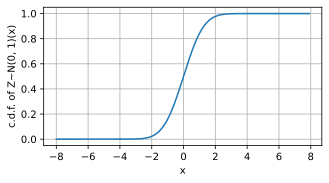

In [ ]:
# Function itself

x=torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y=torch.special.ndtr(x)
d2l.plot(x.detach(), y.detach(), 'x', 'c.d.f. of Z~N(0, 1)(x)', figsize=(5, 2.5))

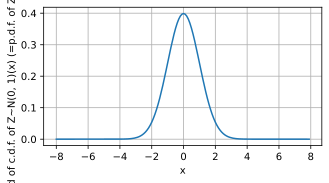

In [ ]:
# Gradient

y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of c.d.f. of Z~N(0, 1)(x) (=p.d.f. of Z~N(0, 1))', figsize=(5, 2.5))

Let X∼N(μ, σ^2). Then,
$$
F_X(x)=\int_{-\infty}^{x} \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(t-\mu)^2}{2\sigma^2}} \,dt
$$
We can substitute by defining k as,
$$
k=\frac{t-\mu}{\sigma},~\sigma dk=dt
$$
Then,
$$
F_X(x)=\int_{-\infty}^{\frac{x-\mu}{\sigma}} \frac{1}{\sqrt{2\pi}}e^{-\frac{k^2}{2}} \,dk
$$
Meanwhile, let Z∼N(0, 1). Then,
$$
F_Z(z)=Φ_Z(z)=\int_{-\infty}^{z} \frac{1}{\sqrt{2\pi}}e^{-\frac{k^2}{2}} \,dk
$$
So, only the region of the integral (or variable) changed.

That's why I only considered Z∼N(0, 1).

Comparing with that of sigmoid function, it goes near to 0 or 1 faster than sigmoid.